In [482]:
import cv2
import numpy as np
import json, pickle
import matplotlib.pyplot as plt

In [483]:
# Load keyboard image
keyboard_image = cv2.imread('../assets/MK101.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(keyboard_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to enhance contrast
_, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area, aspect ratio, etc.
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Draw bounding boxes around remaining contours
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(keyboard_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

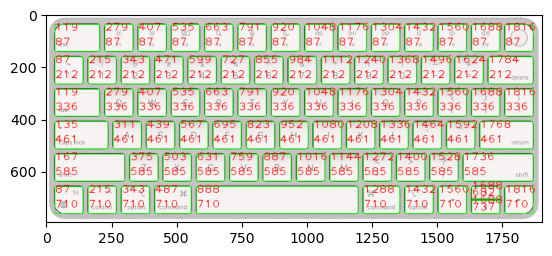

In [484]:
contours, _ = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area | have to experiment to find the right thresholds
filtered_contours = [(i, cnt) for i, cnt in enumerate(contours) if((cv2.contourArea(cnt) > 4000) & (cv2.contourArea(cnt) < 400000))]
keyboard_image = cv2.imread('../assets/MK101.jpg')

coordinates={}
for i, contour in filtered_contours:
    font = cv2.FONT_HERSHEY_PLAIN
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(keyboard_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(keyboard_image, f'{x+w//2}', (x, y+h//4), 1, 3, (255, 0, 0), 2)
    cv2.putText(keyboard_image, f'{y+h//2}', (x, y+4*h//5), 1, 3, (255, 0, 0), 2)
    coordinates[i] = (x+w//2, y+h//2)
coordinates = dict(sorted(coordinates.items(), key=lambda item: (item[1][1], item[1][0])))
plt.imshow(keyboard_image) # makes the task of labelling with centers lot lot easier

In [ ]:
# with open('../assets/coordinates.json', 'w') as file:
#     json.dump(coordinates, file)

In [ ]:
with open('../assets/coordinates.json', 'r') as file:
    coordinates = json.load(file)

In [ ]:
coordinates_dicts = {
    'lower' : {k[0]:v for k, v in coordinates.items() if (len(k.replace('\\',''))<=2)},
    'upper' : {k[1]:v for k, v in coordinates.items() if (len(k.replace('\\',''))<=2)}
    }

In [ ]:
# with open('../assets/coordinates.pkl', 'wb') as file:
#     pickle.dump(coordinates_dicts, file)